## Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from pathlib import Path
START_DIR = Path('/content/drive/MyDrive/Colab_Notebooks/Fine_tuning_HF_SD_model_using_DreamBooth_LoRA')
# START_DIR = '.'
os.chdir(START_DIR)


In [ ]:
%pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
START_DIR

PosixPath('/content/drive/MyDrive/Colab_Notebooks/Fine_tuning_HF_SD_model_using_DreamBooth_LoRA')

## Inference

In [ ]:
from images_functions import ask_chatgpt, generate_images
from flask import Flask, render_template, request, Response
from flask_cors import CORS
import json
from pathlib import Path
from waitress import serve

In [ ]:
user_id = "drphyl"

In [ ]:
USER_DIR = START_DIR / "Users" / user_id

# Get the list of all custom LoRA models available for given User
LORA_DIR = USER_DIR / "custom_models"
custom_model_files =  [""] + [file.name for file in LORA_DIR.glob('*') if file.is_file()]
custom_model_prompts = [file.split("__")[0].replace("-", " ") for file in custom_model_files]


In [ ]:
LORA_DIR

PosixPath('/content/drive/MyDrive/Colab_Notebooks/Fine_tuning_HF_SD_model_using_DreamBooth_LoRA/Users/drphyl/custom_models')

In [ ]:
custom_model_files

['',
 'cat-in-style-of-vasya-lozhkin__stable-diffusion-2-1-base.bin',
 'together__stable-diffusion-2-1-base.bin',
 'crowd_9__stable-diffusion-2-1-base.bin',
 'crowd_7__stable-diffusion-2-1-base.bin',
 'group-of-people__stable-diffusion-2-1-base.bin',
 'jelly-in-a-glass__stable-diffusion-2-1-base.bin']

In [ ]:
custom_model_prompts

['',
 'cat in style of vasya lozhkin',
 'together',
 'crowd_9',
 'crowd_7',
 'group of people',
 'jelly in a glass']

In [ ]:

# Define the constants for Stable Diffusion
parameters_file = START_DIR / "images_parameters.json"
num_images_per_prompt = 4

In [ ]:
object_style = 'Watercolors'
sdiff_model_type = 'regular'
lora_model_index = int('0')
lora_prompt = custom_model_prompts[lora_model_index]
lora_model = custom_model_files[lora_model_index]
num_inference_steps = int('25')

In [ ]:
### PROCESSED_INPUT is a product of  user input (generated on Frontend), so modify next line accordingly ############
processed_input = "Jelly next to cat"

LORA_PATH = LORA_DIR / lora_model

In [ ]:
LORA_PATH

PosixPath('/content/drive/MyDrive/Colab_Notebooks/Fine_tuning_HF_SD_model_using_DreamBooth_LoRA/Users/drphyl/custom_models')

In [ ]:
# Retrieve available image parameters from JSON file
with open(parameters_file) as json_file:
    images_dict = json.load(json_file)
style_prefix = images_dict["object_style"][object_style]["prompt_prefix"]
style_suffix = images_dict["object_style"][object_style]["prompt_suffix"]
negative_prompt = images_dict["object_style"][object_style]["negative_prompt"]
sdiff_model = images_dict["sdiff_models"][sdiff_model_type]["name"].split("/")[-1]

# Print the retrieved data for debugging
print("Stable Diffusion Model selected by User: ", sdiff_model)
print("User folder: ", USER_DIR)
print('lora prompt=', lora_prompt)
print("Finetuned LoRA Model (selected on Frontend): ", LORA_PATH)

In [ ]:
# Automatic prompt generation
task_1 = "Photo" if object_style == "Photography" else "Image"
chatgpt_response_prompt = ask_chatgpt(processed_input, task_1, images_dict["chatgpt_prompts"])

In [ ]:
chatgpt_response_prompt

'Cat sitting next to a jar of jelly, curious, playful, mischievous, fluffy, content, sniffing, on a kitchen counter.'

In [ ]:
# If the LoRA finetuned model is specified and exists,
# corresponding SDiff model will be automatically selected despite the user's selection of the base model,
# and image promts will be generated in a different way
if LORA_PATH.is_file():
    model_name = LORA_PATH.stem
    image_prompt = f"{lora_prompt} {chatgpt_response_prompt}"
    sdiff_model = model_name.split("__")[-1]
else:
    image_prompt = f"{style_prefix} {chatgpt_response_prompt}, {style_suffix}."
    model_name = sdiff_model
    LORA_PATH = ""

MODEL_PATH = START_DIR / "HF_models" / sdiff_model

# Print the retrieved data for debugging

print("Basic model path: ", MODEL_PATH)
print(f"Model used for image generation: {model_name} \nConstructed Prompt: {image_prompt}\n")



In [ ]:
# Send the image bytes to the frontend
image_response = generate_images(
            image_prompt=image_prompt,
            MODEL_PATH=MODEL_PATH,
            custom_model_path=LORA_PATH,
            USER_DIR=USER_DIR,
            negative_prompt=negative_prompt,
            num_inference_steps=num_inference_steps,
            num_images_per_prompt=num_images_per_prompt,
            save_images=True
        )


*** COMMERCIAL USE IS FORBIDDEN ***

Successfully loaded base model /content/drive/MyDrive/Colab_Notebooks/Fine_tuning_HF_SD_model_using_DreamBooth_LoRA/HF_models/stable-diffusion-2-1-base


  0%|          | 0/25 [00:00<?, ?it/s]

Images saved on local drive in [/content/drive/MyDrive/Colab_Notebooks/Fine_tuning_HF_SD_model_using_DreamBooth_LoRA/Users/drphyl/output/stable-diffusion-2-1-base/watercolors-image-of-cat-sitting-next-to-a-jar-of-jelly-curious-playful-mischievous-fluffy-content-sniffing-on-a-kitchen-counter-excellent-composition-main-object-in-the-middle] folder
Images saved on local drive in [/content/drive/MyDrive/Colab_Notebooks/Fine_tuning_HF_SD_model_using_DreamBooth_LoRA/Users/drphyl/output/stable-diffusion-2-1-base/watercolors-image-of-cat-sitting-next-to-a-jar-of-jelly-curious-playful-mischievous-fluffy-content-sniffing-on-a-kitchen-counter-excellent-composition-main-object-in-the-middle] folder
Images saved on local drive in [/content/drive/MyDrive/Colab_Notebooks/Fine_tuning_HF_SD_model_using_DreamBooth_LoRA/Users/drphyl/output/stable-diffusion-2-1-base/watercolors-image-of-cat-sitting-next-to-a-jar-of-jelly-curious-playful-mischievous-fluffy-content-sniffing-on-a-kitchen-counter-excellent-co

In [ ]:
# HTTP responce to Front-end
Response(json.dumps(image_response), mimetype='application/json')

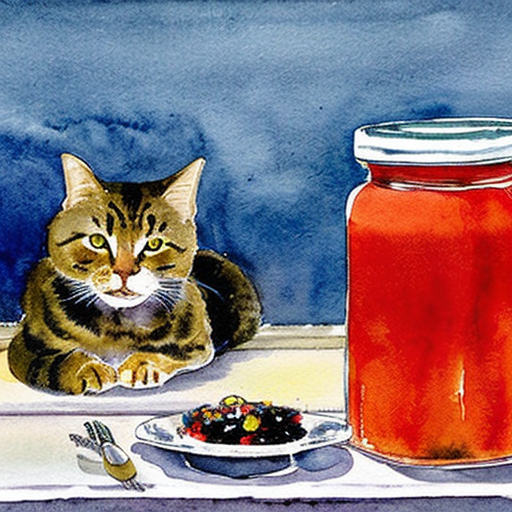

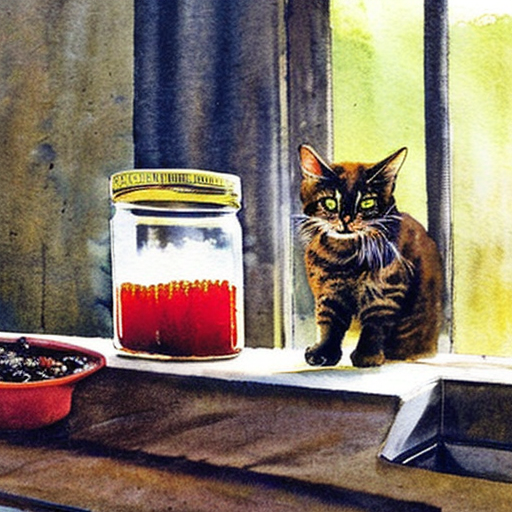

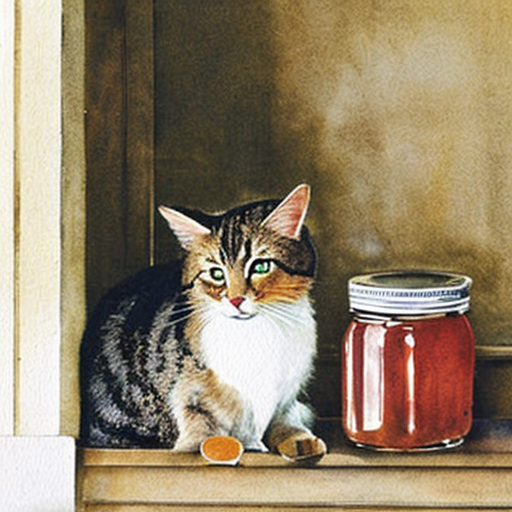

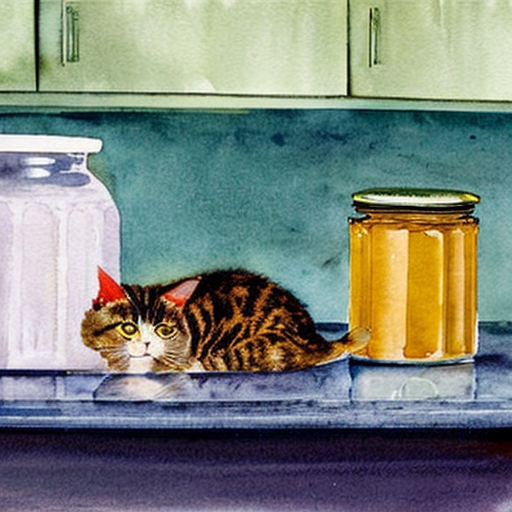

In [ ]:
# Manually displays all generated images
import base64
import io
from PIL import Image
from IPython.display import display


for idx, im in enumerate(image_response):
  img = Image.open(io.BytesIO(base64.b64decode(im)))
  display(img)

In [ ]:
# Run app in debugging (vanilla Flask on default "127.0.0.1:5000")

app.run(debug=True)

In [ ]:
# Run app in production (Waitress)
serve(app, host=localhost, port=8080)